# TUTORIAL ON THE TOOLBOX `pLearningTools`

by Sebastian T. Glavind, June 2020

# Parameter learning from fully observed data

This notebook considers how to use the toolbox `pLearningTools` to learn the parameter distributions of a discrete Bayesian network model, when the graph structure (DAG) and discretization policy for continuous variables are defined. The graph structure and discretization policy were found in a previous tutorial: *Dynamic discretization and structure learning from fully observed data*, which will be the basis for this tutorial.


## Prelude

In [51]:
library(bnlearn) # Package for learning bayesian networks (BNs)
source("../MyToolboxes/pLearningTools.R") # load toolbox from source location

## Data and input

In this tutorial, we use the publicly available [sachs](https://www.bnlearn.com/book-crc/) data set.

### Continuous data

In [52]:
DATA = read.table("../Discretize&sLearn/sachs.data.txt", header = T) # load continuous data set (data frame) from source location
nodes = names(DATA) # variable names

### Discrete data, discretization boundaries and BN model (from previous tutorial)

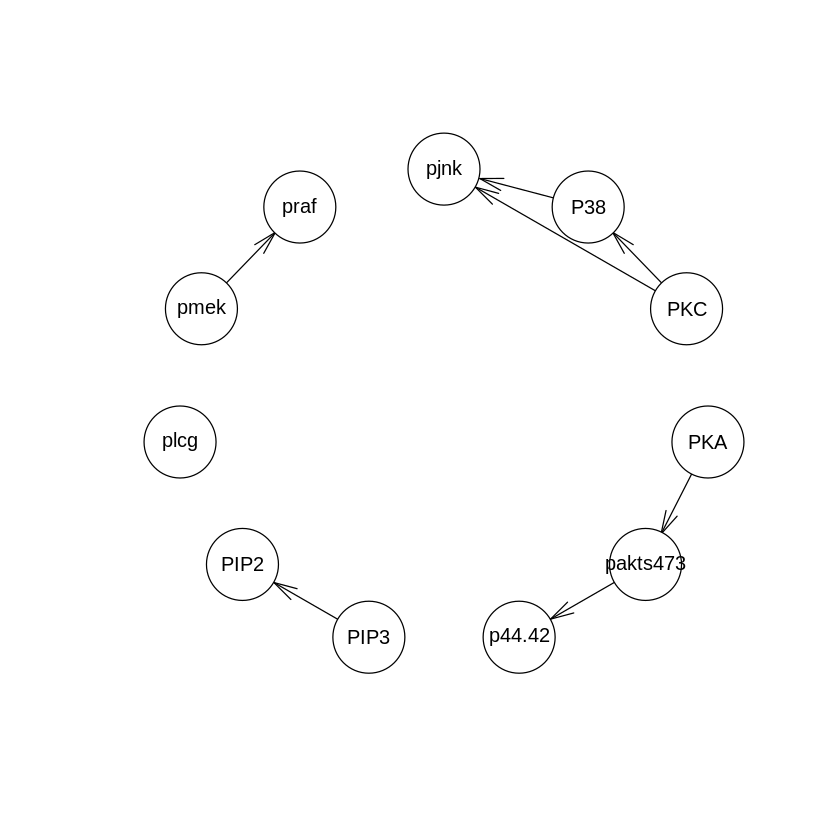

In [53]:
load("BNs_sLearn_fullyObs.rda")

plot(RES1$BN)

In [54]:
summary(RES1$dDATA, maxsum = 20)

          praf              pmek              plcg             PIP2    
 (-Inf,40.7]:290   (-Inf,16.1]:160   (-Inf,13.3]:285   (-Inf,48] :426  
 (40.7,64.4]:279   (16.1,24.2]:261   (13.3,20.9]:284   (48,146]  :300  
 (64.4, Inf]:284   (24.2,38]  :273   (20.9, Inf]:284   (146, Inf]:127  
                   (38,56]    :105                                     
                   (56, Inf]  : 54                                     
          PIP3             p44.42           pakts473                PKA     
 (-Inf,16.3]:288   (-Inf,10.4]:287   (-Inf,22.9]:287   (-Inf,154]     : 31  
 (16.3,32.8]:282   (10.4,14.1]:122   (22.9,35.5]:285   (154,394]      :318  
 (32.8, Inf]:283   (14.1,18.5]:127   (35.5, Inf]:281   (394,701]      :317  
                   (18.5,28.2]:188                     (701,1.49e+03] :152  
                   (28.2, Inf]:129                     (1.49e+03, Inf]: 35  
          PKC               P38               pjnk    
 (-Inf,9.06]:285   (-Inf,22]  :223   (-Inf,14.6]:28

## Parameter learning

Having defined the graph structure and discretization, we can quantify the model parameters using Bayesian statistics with the Dirichlet equivalent uniform priors. In this regard we assume both global and local parameter independence, see e.g. Koller and Friedman (2009) for further details.

***
D. Koller and N. Friedman, Probabilistic graphical models: principles and techniques. MIT Press, 2009.
***


### Imaginary sample size for Dirichlet prior

In [55]:
# # Imaginary sample size
scale_iss = 1 # current recommendation, see Ueno (2010)

***
M.  Ueno,  “Learning  networks  determined  by  the  ratio  of  prior  and  data,”  in Proceedings of 26th Conference on Uncertainty in Artificial Intelligence, 2010, pp. 1–8
***

### Maximum a-posteriori (MAP) parameters with `bnlearn` functionalities

In [56]:
BNmap = bn.fit(RES1$BN, data = RES1$dDATA, method = 'bayes', iss = scale_iss)

BNmap


  Bayesian network parameters

  Parameters of node praf (multinomial distribution)

Conditional probability table:
 
             pmek
praf          (-Inf,16.1] (16.1,24.2]   (24.2,38]     (38,56]   (56, Inf]
  (-Inf,40.7] 0.824386184 0.413731496 0.142996584 0.105196451 0.001230012
  (40.7,64.4] 0.162713275 0.459673303 0.413860420 0.171736375 0.038130381
  (64.4, Inf] 0.012900541 0.126595202 0.443142997 0.723067174 0.960639606

  Parameters of node pmek (multinomial distribution)

Conditional probability table:
 (-Inf,16.1] (16.1,24.2]   (24.2,38]     (38,56]   (56, Inf] 
 0.18758782  0.30585480  0.31990632  0.12318501  0.06346604 

  Parameters of node plcg (multinomial distribution)

Conditional probability table:
 (-Inf,13.3] (13.3,20.9] (20.9, Inf] 
   0.334114    0.332943    0.332943 

  Parameters of node PIP2 (multinomial distribution)

Conditional probability table:
 
            PIP3
PIP2         (-Inf,16.3] (16.3,32.8] (32.8, Inf]
  (-Inf,48]   0.72870906  0.42896497  0.335

### Fit MAP parameters and parameters distributions using `pLearningTools`

#### Posterior counts for conditional probability tables (CPTs)

- bn: Graph structure (DAG) of class bn (bnlearn)
- ddata: Discrete data set
- n_iss: Imaginary sample size for Bayesian Dirichlet equivalent uniform prior

In [57]:
PC = posterior_counts_bn(bn = RES1$BN, ddata = RES1$dDATA, n_iss = scale_iss) # //*pLearningTools*//

#### MAP parameters

- PC: Table object of posterior counts for parametrizing conditional probability tables (CPTs) - local Dirichlet distributions.

In [58]:
CPTmap2 = myMAP(PC = PC) # //*pLearningTools*//
BNmap2 = custom.fit(RES1$BN, dist = CPTmap2) # Create fitted BN object (bnlearn formate)

BNmap2


  Bayesian network parameters

  Parameters of node praf (multinomial distribution)

Conditional probability table:
 
             pmek
praf          (-Inf,16.1] (16.1,24.2]   (24.2,38]     (38,56]   (56, Inf]
  (-Inf,40.7] 0.824386184 0.413731496 0.142996584 0.105196451 0.001230012
  (40.7,64.4] 0.162713275 0.459673303 0.413860420 0.171736375 0.038130381
  (64.4, Inf] 0.012900541 0.126595202 0.443142997 0.723067174 0.960639606

  Parameters of node pmek (multinomial distribution)

Conditional probability table:
 pmek
(-Inf,16.1] (16.1,24.2]   (24.2,38]     (38,56]   (56, Inf] 
 0.18758782  0.30585480  0.31990632  0.12318501  0.06346604 

  Parameters of node plcg (multinomial distribution)

Conditional probability table:
 plcg
(-Inf,13.3] (13.3,20.9] (20.9, Inf] 
   0.334114    0.332943    0.332943 

  Parameters of node PIP2 (multinomial distribution)

Conditional probability table:
 
            PIP3
PIP2         (-Inf,16.3] (16.3,32.8] (32.8, Inf]
  (-Inf,48]   0.72870906  0.42896

In [59]:
# Test that this gives the same results as found using the bnlearn package.
# Note that due to a different naming of attributes between the bn.fit and CPTs2 function, 
# we need to check correspondence of the numerical values, as...   
for (i in 1:length(BNmap2)){
  print(i)
  a = BNmap[[i]]$prob
  b = BNmap2[[i]]$prob
  if ( length( dim(a) ) == 1 ){
    a = unname(a); # print(a)
    b = unname(b); # print(b)
  }
  print(all.equal(a,b))
}

[1] 1
[1] TRUE
[1] 2
[1] TRUE
[1] 3
[1] TRUE
[1] 4
[1] TRUE
[1] 5
[1] TRUE
[1] 6
[1] TRUE
[1] 7
[1] TRUE
[1] 8
[1] TRUE
[1] 9
[1] TRUE
[1] 10
[1] TRUE
[1] 11
[1] TRUE


#### Draw parameters realization from probabilistic model

Instead of using the MAP parameters to define the BN model, we may use the parameters distributions to draw realizations of the CTPs when needed, thus including parameters uncertainties in the model specification. This of cause has the implication that multiple realizations are needed in an inference setting, see the tutorial on inference for BN models.

- PC: Table object of posterior counts for parametrizing conditional probability tables (CPTs) - local Dirichlet distributions.

In [60]:
set.seed(42)

# One draw from the parameter posterior distribution
CPTsamp = myDirichletSampler(PC = PC) # c
BNsamp = custom.fit(RES1$BN, dist = CPTsamp)

BNsamp


  Bayesian network parameters

  Parameters of node praf (multinomial distribution)

Conditional probability table:
 
             pmek
praf          (-Inf,16.1] (16.1,24.2]   (24.2,38]     (38,56]   (56, Inf]
  (-Inf,40.7] 0.858181864 0.395555267 0.190945270 0.057140477 0.001018791
  (40.7,64.4] 0.132367705 0.485786633 0.409961771 0.205593046 0.036515204
  (64.4, Inf] 0.009450431 0.118658099 0.399092959 0.737266477 0.962466005

  Parameters of node pmek (multinomial distribution)

Conditional probability table:
 pmek
(-Inf,16.1] (16.1,24.2]   (24.2,38]     (38,56]   (56, Inf] 
 0.16798705  0.28726283  0.34322500  0.13822783  0.06329728 

  Parameters of node plcg (multinomial distribution)

Conditional probability table:
 plcg
(-Inf,13.3] (13.3,20.9] (20.9, Inf] 
  0.3527075   0.3372252   0.3100673 

  Parameters of node PIP2 (multinomial distribution)

Conditional probability table:
 
            PIP3
PIP2         (-Inf,16.3] (16.3,32.8] (32.8, Inf]
  (-Inf,48]   0.70251435  0.46879

In [61]:
# save(BNmap, PC,file='BNs_pLearn_fullyObs.rda')